In [1]:
# -*- coding:utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### 4.2 Seaborn 高级数据可视化
Seaborn 是基于 Matplotlib 的高级绘图层。虽然 Matplotlib 包含饼图、直方图、三维图以及多图组合等基本工具，但是在使用时需要设置各种参数，而Seaborn简化了这一问题。它提供简单的代码来解决复杂的问题，尤其是多图组合的模式，不但作图清晰、美观，更是在同一图示中集合和对比了大量信息。这些工作如果只使用底层的Matplotlib实现，可能需要几倍甚至几十倍的代码量。另外，Seaborn还给我们提供了多种美观的图示风格，以及看问题的各种视角。综上，Saeborn的主要优点是简单、美观且多视角。

### 4.2.1  准备工作

安装命令：pip install seaborn

In [2]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm # 示例使用了statsmodels库中的自带的数据
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set(style='darkgrid',color_codes=True) # 带灰色网格的背景风格
tips=sns.load_dataset('tips')  # 示例中的基本数据


### 4.2.2  连续变量相关图

（1）Relplot关系类型图表

Relplot 可以支持点图 kind='scatter'和线图 kind='line'两种作图方法。下例把 sex，time，day，tip，total_bill五维数据绘制在一张图上，两个数值类型tip和total_bill分别对应y轴和x轴，其他三个维度是枚举型变量，分别用hue设置颜色、col设置行、row设置列。Seaborn的大多数函数都支持使用这几个参数实现多图对比。

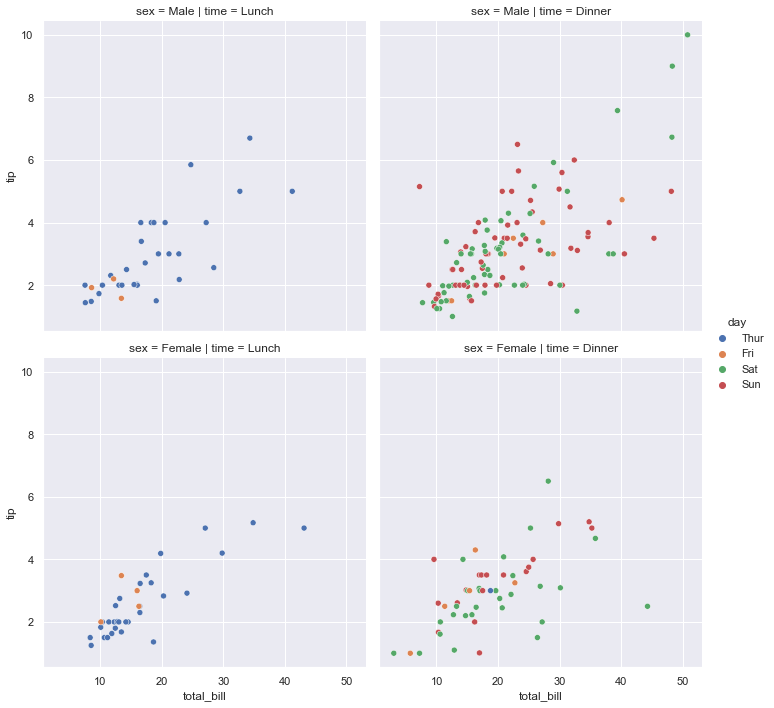

In [3]:
sns.relplot(x="total_bill", y="tip", hue="day",col="time", row="sex", data=tips)

(2)点图

点图在上面的维度之上增加了点大小的维度（此维度为数值型）。

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

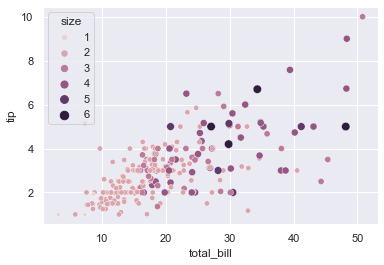

In [4]:
sns.scatterplot(x="total_bill", y="tip", hue="size", size="size", data=tips)

(3)线图 

线图使用 style参数，也增加了用不同线（实线、虚线）表示不同类型的新维度（此维度为分类型）。

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

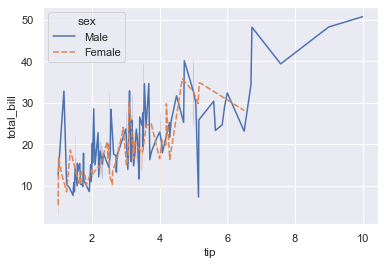

In [5]:
sns.lineplot(x="tip", y="total_bill", hue="sex", style="sex", data=tips)

### 4.2.3  分类变量图
分类变量图描述的是连续变量在分类之后，其类与类之间的对比关系。

(1)stripplot散点图

stripplot展示的是使用分类变量day分类后，对各类的连续变量total_bill的统计作图。

<AxesSubplot:xlabel='day', ylabel='total_bill'>

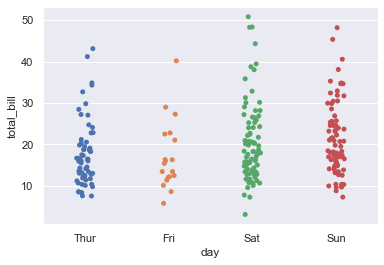

In [6]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True)

(2)swarmplot散点图  

swarmplot 的功能和 stripplot 的类似，为避免重叠而无法估算数量的多少，swarmplot将每个点散开，这样做的缺点是耗时，因此当数据量非常大的时候并不适用。

<AxesSubplot:xlabel='day', ylabel='total_bill'>

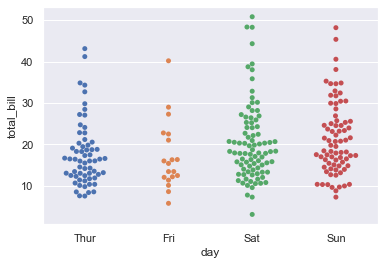

In [7]:
sns.swarmplot(x='day',y='total_bill',data=tips)

(3) violinplot小提琴图

为展示具体的分布，Seaborn还支持小提琴图。在本例中，按不同day分类并在每个图上用小提琴图画出不同性别的total_bill核密度分布图。

<AxesSubplot:xlabel='day', ylabel='total_bill'>

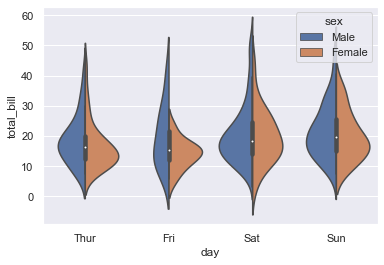

In [8]:
sns.violinplot(x="day", y="total_bill", hue="sex", split=True, data=tips)

(4) boxplot箱式图

boxplot箱式图也称盒须图或盒式图，用于描述一组数据的分布情况。

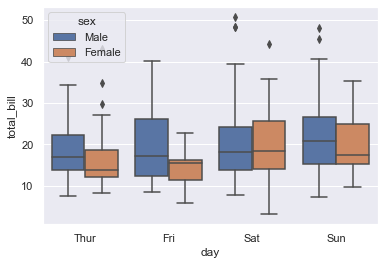

In [9]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips);

(5) boxenplot变种箱式图

boxenplot 变种箱式图也被称为增强箱式图，在图中使用更多分位数绘制出更丰富的分布信息，尤其细化了尾部数据的分布情况。

<AxesSubplot:xlabel='day', ylabel='total_bill'>

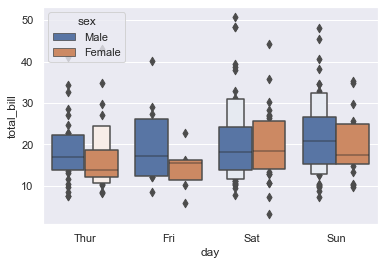

In [10]:
sns.boxenplot(x="day", y="total_bill", hue="sex", data=tips)

(6) pointplot分类统计图

pointplot分类统计图中的横坐标代表类别，纵坐标展示了该类别对应值的分布。与箱式图不同的是，它以连接的方式描述类别之间的关系，更适用于多个有序的类别。

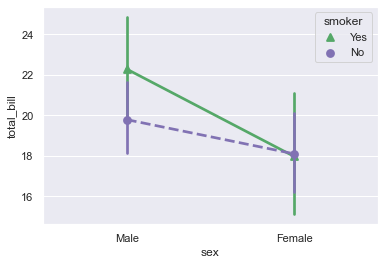

In [11]:
sns.pointplot(x="sex", y="total_bill", hue="smoker", data=tips,
palette={"Yes": "g", "No": "m"},
markers=["^", "o"], linestyles=["-", "--"]);

(7) barplot柱对比图

barplot 柱对比图可用于对比两种分布的均值和方差，本例展示了在不同性别、不同吸烟情况的人群中，total_bill均值和方差的差异。

<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

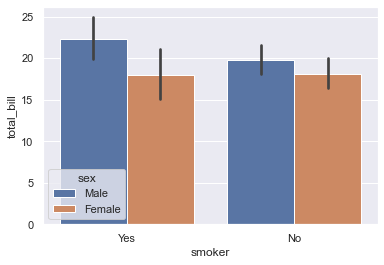

In [12]:
sns.barplot(x='smoker',y='total_bill',hue='sex',data=tips)

### 4.2.4  回归图

(1) 连续变量回归图

implot是在散点图的基础上加入回归模型的绘图方法。

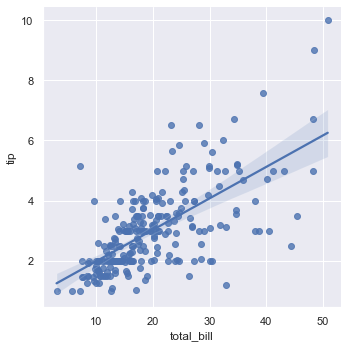

In [13]:
sns.lmplot(x="total_bill", y="tip", data=tips)

(2) 分类变量回归图

分类变量回归图可以使用参数x_estimator=np.mean对每个类别的统计量作图。

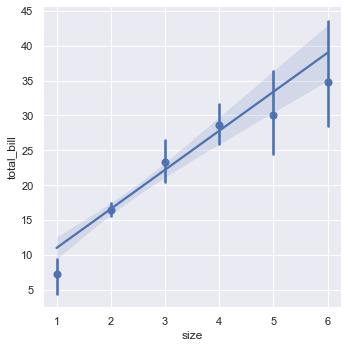

In [14]:
sns.lmplot(x="size", y="total_bill", data=tips, x_estimator=np.mean)

### 4.2.5 多图组合

(1) jointplot两变量图

在数据分析中，常用作图的方式实现相关性分析，即x轴设置为变量A，y轴设置为变量B，然后做散点图。在散点图中，点是叠加显示的，但有时还需要关注每个变量自身的分布情况，而jointplot可以把描述变量的分布图和变量相关的散点图组合在一起，是相关性分析最常用的工具。另外，图片上还能展示回归曲线以及相关系数。

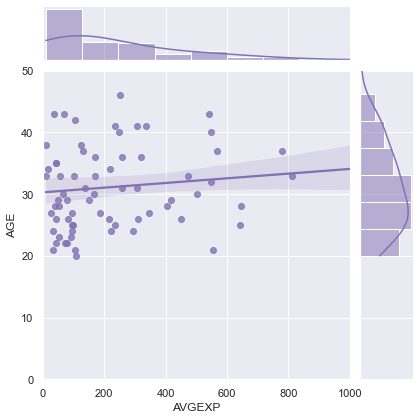

In [15]:
import statsmodels.api as sm
import seaborn as sns
sns.set(style="darkgrid")
data = sm.datasets.ccard.load_pandas().data
g = sns.jointplot('AVGEXP', 'AGE', data=data, kind="reg",
                 xlim=(0, 1000), ylim=(0, 50), color="m")


本例中使用statsmodels库的ccard数据分析其中两个数值类型变量的相关性，使用xlim和ylim设置图片显示范围，忽略了离群点，kind参数可设置作图方式，如scatter散点图、kde密度图、hex六边形图等，本例中选择reg画出了线性回归图。

(2) pairplot多变量图

如果对N个变量的相关性做散点图，maplotlib则需要做N×N个图，而pairplot函数调用一次即可实现，其对角线上是直方图，其余都是两两变量的散点图，这样不仅简单，而且还能组合在一起做对比。

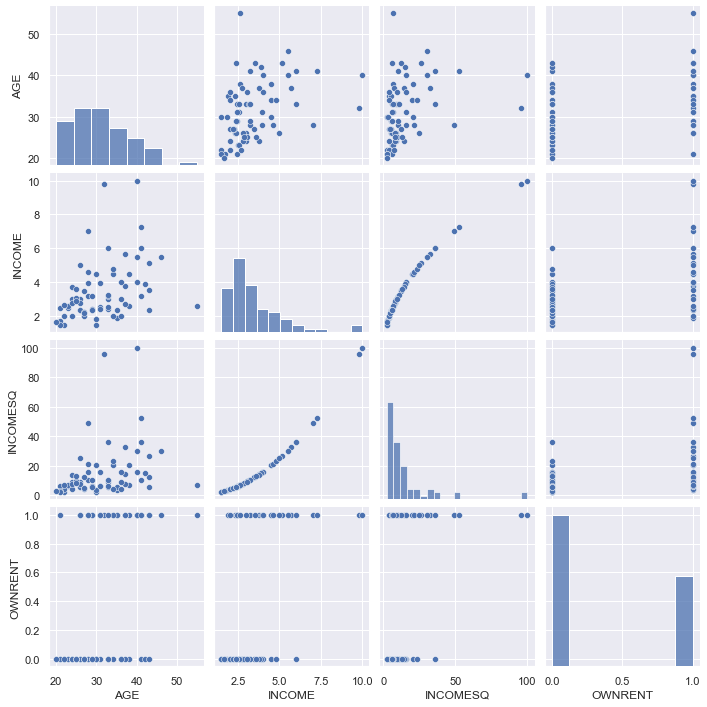

In [16]:
data = sm.datasets.ccard.load_pandas().data
sns.pairplot(data, vars=['AGE','INCOME', 'INCOMESQ','OWNRENT'])

从图中可以看到，数据类型INCOME与INCOMESQ呈强相关，AGE与INCOME也有一定的相关趋势，对角线上的图对应的是每个因素与其自身的对比，图中以直方图的形式显示了该变量的分布。

(3) factorplot两变量关系图

factorplot用于绘制两维变量的关系图，用kind指定其做图类型，包括point，bar，count，box，violin，strip等。

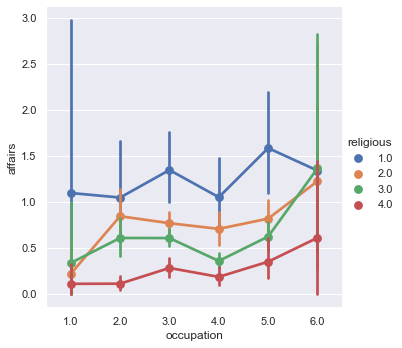

In [17]:
data = sm.datasets.fair.load_pandas().data
sns.factorplot(x='occupation', y='affairs', hue='religious', data=data)

(4) FacetGrid结构化绘图网格

FacetGrid可以选择任意作图方式以及自定义的作图函数。这通常包含两部分：FacetGrid部分指定数据集、行、列，map部分指定作图方式及相应参数。

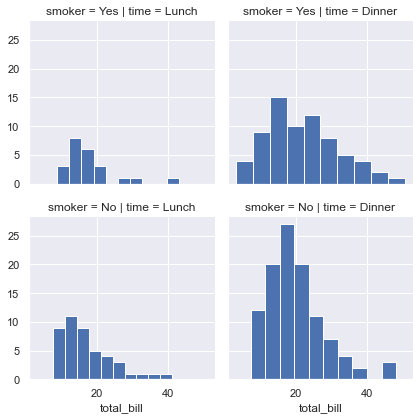

In [18]:
g = sns.FacetGrid(tips, col = 'time', row = 'smoker') # 按行和列的分类做N个图
g.map(plt.hist, 'total_bill', bins = 10) # 指定做图方式

可以看到，不论是连续图还是分类图，不论是用FacetGrid还是用barplot都是将多个特征放在同一张图片上展示，其差别在于观察角度不同和数据自身的类型。

### 4.2.6  热力图
热力图（heatmap）也常用来展示数据表中多个特征的两两线性相关性，尤其在变量的数量较多时，它比pairplot更直观，也更加节约计算资源。

<AxesSubplot:>

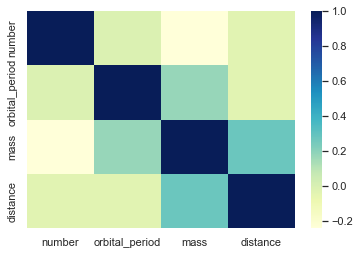

In [19]:
 data = sns.load_dataset('planets')
 corr=data[['number','orbital_period','mass','distance']].corr(method='pearson')
 sns.heatmap(corr, cmap="YlGnBu") 

### 4.2.7  印刷品作图

用Matplotlib或Seaborn生成的图片除了用于开发者分析数据、作PPT展示，往往还用于纸制品的印刷。例如，制作成书籍中的图片或者发布论文等。在用于印刷时，图片需要有足够的分辨率，在4.1.10小节中介绍了将图表导出成图片以及设置图片分辨率的方法。

除了考虑图片分辨率，还需要考虑出版物中字体的大小及版面的大小，以调整图片中文字的大小，这在创建绘图区域时可以使用不同的figsize。对于非彩色印刷，还需要注意其背景颜色不能太深，以及需要将图表中不同的颜色（当红、绿、蓝图转成黑白图时，都变成了相似的深灰色）转换成不同亮度的单色。下面介绍Seaborn中常用的两种方法：

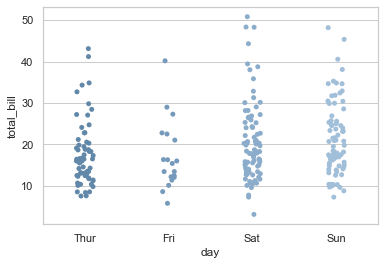

In [20]:
# 第一种：将背景设置为白色加网格。
sns.set_style("whitegrid")
# 第二种：将默认的用颜色表示的不同类型设置为单色，由深到浅表示不同的类型。
with sns.cubehelix_palette(start=2.7, rot=0, dark=.5, light=.8, 
          reverse=True, n_colors=5):
    # 此处放置具体绘图函数
    sns.stripplot(x='day', y='total_bill', data=tips, jitter=True)